## Importing Libraries

In [56]:
!pip install torch
!pip install numpy
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to

In [57]:
import numpy as np                     # linear algebra
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt   # visualization library
import seaborn as sns                  # visualization library
import torch                           # machine learning library

## Import Supervised Data

The data-set is provided by the create_game_classifier_dataset.ip
in several csv files with [id, obs0, .., obs1599, game_name] structure.

- Input (X) = (40,40)*n matrix of image like data known as 'observation' of the agent.
- Output (Y) = (GameTypes,)*n an array of game_id per input.

In [58]:
df_billiard = pd.read_csv("/content/billiard-competition_classifier_dataset.csv")
df_curling = pd.read_csv("/content/curling-IJACA-competition_classifier_dataset.csv")
df_football = pd.read_csv("/content/football_classifier_dataset.csv")
df_running = pd.read_csv("/content/running-competition11_classifier_dataset.csv")
df_hockey = pd.read_csv("/content/table-hockey_classifier_dataset.csv")

## Combining the Dataframes

In [144]:
df_billiard.shape, df_curling.shape, df_football.shape, df_running.shape, df_hockey.shape

((7000, 10002), (7000, 1602), (7000, 1602), (2000, 1602), (7000, 1602))

In [145]:
#df_combined = pd.concat([df_billiard, df_curling, df_football, df_running, df_hockey], ignore_index=True) billiard isn't correct..
df_combined = pd.concat([df_curling, df_football, df_running, df_hockey], ignore_index=True)

In [146]:
df_combined.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,game_name
0,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,curling-IJACA-competition
1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,curling-IJACA-competition
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,curling-IJACA-competition
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,curling-IJACA-competition
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,curling-IJACA-competition


In [147]:
df_combined = df_combined.drop(df_combined.columns[0], axis=1) # drop the first (ID) column

## Shuffling the combined data

In [148]:
from sklearn.utils import shuffle
df_combined = shuffle(df_combined, random_state=1)

## Checking for missing N/A values in the data set.

In [149]:
df_combined.isnull().sum().sum()

0

## Checking the Data distribution.

['football' 'table-hockey' 'curling-IJACA-competition'
 'running-competition11']


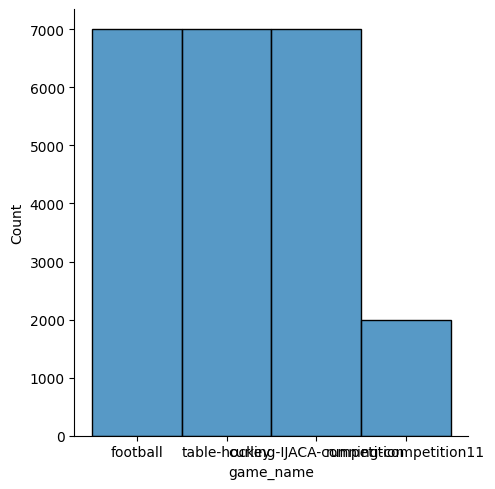

In [150]:
sns.displot(df_combined['game_name'])
print(df_combined['game_name'].unique())

## Spliting the Data into X and Y

In [195]:
X = df_combined.drop('game_name', axis=1)
y = df_combined['game_name']

In [173]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
10673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13215,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0
21205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7473,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
y.head()

10673        football
13215        football
13736        football
21205    table-hockey
7473         football
Name: game_name, dtype: object

## Data Shaping

In [196]:
reshaped_X = X.values.reshape(X.shape[0], 40, 40)
X = reshaped_X

X.shape

(23000, 40, 40)

## Data Visualization

6149


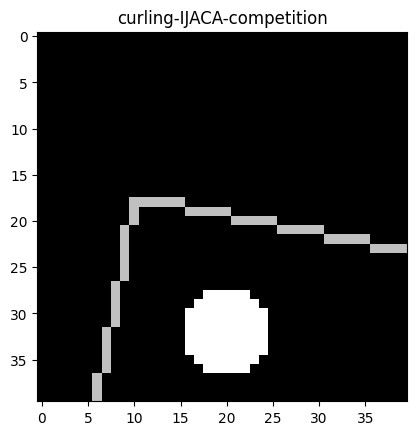

In [176]:
observation_id = np.random.randint(-1,len(X))
print(observation_id)

obs_mat = X[observation_id, :, :]
plt.title(y[observation_id])
plt.imshow(obs_mat, 'gray')

## Maping y values to indexs

In [197]:
y = y.replace('football',0)
y = y.replace('table-hockey',1)
y = y.replace('curling-IJACA-competition',2)
y = y.replace('running-competition11',3)
#y = y.replace('billiard-competition',4)
y.head()

10673    0
13215    0
13736    0
21205    1
7473     0
Name: game_name, dtype: int64

## Data Splitting: Creating Train and Dev Sets

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20700, 40, 40), (2300, 40, 40), (20700,), (2300,))

## Defining the Model (CNN)

In [179]:
from torch import nn
from torch.nn import functional as F
from torchsummary import summary
print(torch.__version__)

2.0.1+cu118


In [180]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 64, 3),
            nn.ReLU()
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 6 * 6, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1) # softmax layer
        )

    def forward(self, x):
        x = self.model(x)
        x = self.fc(x)
        return x

In [181]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # if you have a GPU, otherwise it will use CPU
model = Net().to(device)

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

summary(model, (1, 40, 40))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 38, 38]             320
              ReLU-2           [-1, 32, 38, 38]               0
         MaxPool2d-3           [-1, 32, 19, 19]               0
            Conv2d-4           [-1, 64, 17, 17]          18,496
              ReLU-5           [-1, 64, 17, 17]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7             [-1, 64, 6, 6]          36,928
              ReLU-8             [-1, 64, 6, 6]               0
           Flatten-9                 [-1, 2304]               0
           Linear-10                   [-1, 64]         147,520
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
       LogSoftmax-13                   [-1, 10]               0
Total params: 203,914
Trainable params:

## Training the Model

In [193]:
# PyTorch DataLoader for handling batching of the input data
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [199]:
# reshape X data to include channel dimension
X_train = torch.from_numpy(np.expand_dims(X_train, axis=1)).float().to(device)
X_val = torch.from_numpy(np.expand_dims(X_val, axis=1)).float().to(device)

y_train = torch.tensor(y_train.values, dtype=torch.long, device=device)
y_val = torch.tensor(y_val.values, dtype=torch.long, device=device)

# reshape the y data to be 2D
y_train = y_train.view(-1)
y_val = y_val.view(-1)

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128)

epochs = 15
train_acc, val_acc = [], []

for epoch in range(epochs):
    model.train() # switch to training mode
    correct = 0
    pbar = tqdm(train_loader)
    for X, y in pbar:
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        # calculate training accuracy
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(y.view_as(pred)).sum().item()
        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f} | Acc: {correct / len(X_train):.4f}")

    train_acc.append(correct / len(X_train))

    model.eval() # switch to evaluation mode
    correct = 0
    pbar = tqdm(val_loader)
    with torch.no_grad():
        for X, y in pbar:
            output = model(X)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(y.view_as(pred)).sum().item()
            pbar.set_description(f"Validating | Acc: {correct / len(X_val):.4f}")

    val_acc.append(correct / len(X_val))

Epoch 1 | Loss: 0.2594 | Acc: 0.8713: 100%|██████████| 162/162 [00:36<00:00,  4.40it/s]
Validating | Acc: 0.8600: 100%|██████████| 18/18 [00:01<00:00, 12.08it/s]
Epoch 2 | Loss: 0.1948 | Acc: 0.4392: 100%|██████████| 162/162 [00:37<00:00,  4.37it/s]
Validating | Acc: 0.8696: 100%|██████████| 18/18 [00:01<00:00, 12.11it/s]
Epoch 3 | Loss: 0.1700 | Acc: 0.2928: 100%|██████████| 162/162 [00:37<00:00,  4.31it/s]
Validating | Acc: 0.8622: 100%|██████████| 18/18 [00:01<00:00, 12.08it/s]
Epoch 4 | Loss: 0.1556 | Acc: 0.2233: 100%|██████████| 162/162 [00:37<00:00,  4.37it/s]
Validating | Acc: 0.8861: 100%|██████████| 18/18 [00:01<00:00, 12.31it/s]
Epoch 5 | Loss: 0.2030 | Acc: 0.1801: 100%|██████████| 162/162 [00:37<00:00,  4.30it/s]
Validating | Acc: 0.8796: 100%|██████████| 18/18 [00:02<00:00,  8.27it/s]
Epoch 6 | Loss: 0.2482 | Acc: 0.1492: 100%|██████████| 162/162 [00:37<00:00,  4.34it/s]
Validating | Acc: 0.8722: 100%|██████████| 18/18 [00:01<00:00, 12.28it/s]
Epoch 7 | Loss: 0.2195 | Acc

## Evaulating the Performance

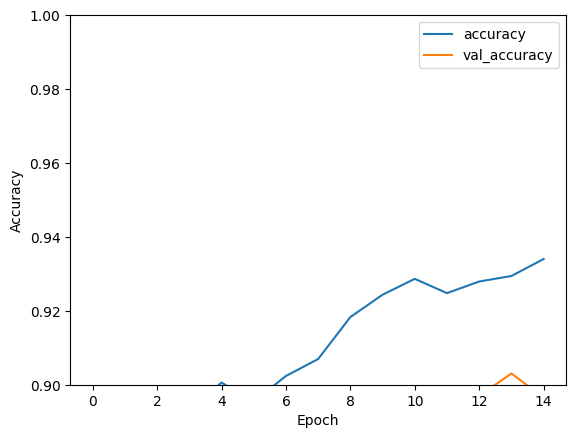

In [200]:
plt.plot(train_acc, label='accuracy')
plt.plot(val_acc, label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend()
plt.show()

In [202]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total_loss = 0
    total_samples = 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)

            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == y).sum().item()
            total_loss += loss.item() * X.size(0)
            total_samples += y.size(0)

    return total_loss/total_samples, correct/total_samples

# usage:
val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)
val_loss, val_acc

(0.2894925416034201, 0.8965217391304348)

In [ ]:
#df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
#df

## Saving the model

In [1]:
torch.save(model.state_dict(), 'model.pth')

NameError: ignored